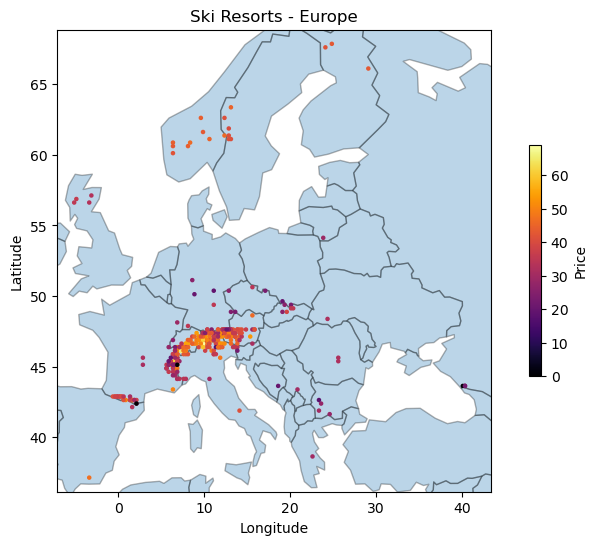

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

#getting cleaned csv
df = pd.read_csv("/Users/haleybrewster/DSP/europe_with_snow.csv")

#for plot color visual get rid of outliers
df = df[df["Price"] <= 75].copy()

#world map 
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

# geodataframe from our data
geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df,geometry=geometry,crs="EPSG:4326")

#Plotting
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, alpha=0.3, edgecolor="black")

gdf.plot(
    ax=ax,
    column="Price",
    cmap="inferno",
    markersize=5,
    legend=True,
    legend_kwds={"label": "Price", "shrink": 0.5},
)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Ski Resorts - Europe")

ax.set_xlim(gdf.geometry.x.min() - 2, gdf.geometry.x.max() + 3)
ax.set_ylim(gdf.geometry.y.min() - 1, gdf.geometry.y.max() + 1)

plt.show()

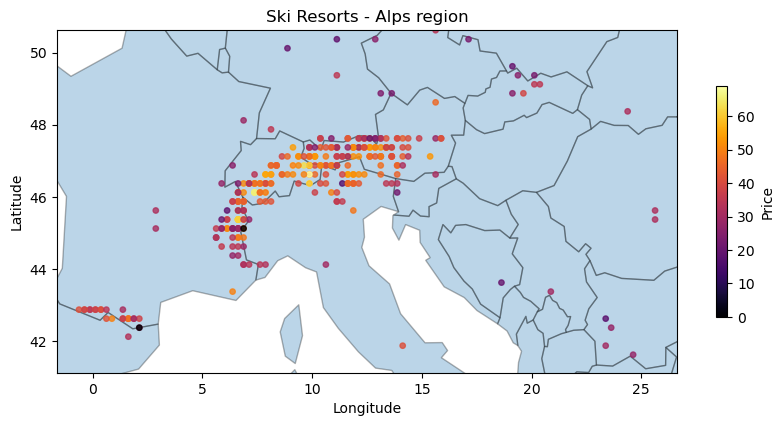

In [7]:
# Zooming in on the cluster
cluster_mask = (
    gdf.geometry.y.between(42, 50) &
    gdf.geometry.x.between(-5, 35)
)
cluster = gdf[cluster_mask]

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, alpha=0.3, edgecolor="black")

gdf.plot(ax=ax, column="Price", cmap="inferno", 
         markersize=15, alpha=0.8,legend =True,
         legend_kwds={"label": "Price", "shrink": 0.5} )


ax.set_xlim(cluster.geometry.x.min() - 1, cluster.geometry.x.max() + 1)
ax.set_ylim(cluster.geometry.y.min() - 1, cluster.geometry.y.max() + 1)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Ski Resorts - Alps region")

plt.show()